<a href="https://colab.research.google.com/github/raushan9jnv/Seoul-Bike-Sharing-Demand-Prediction---Capstone-Project--2/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

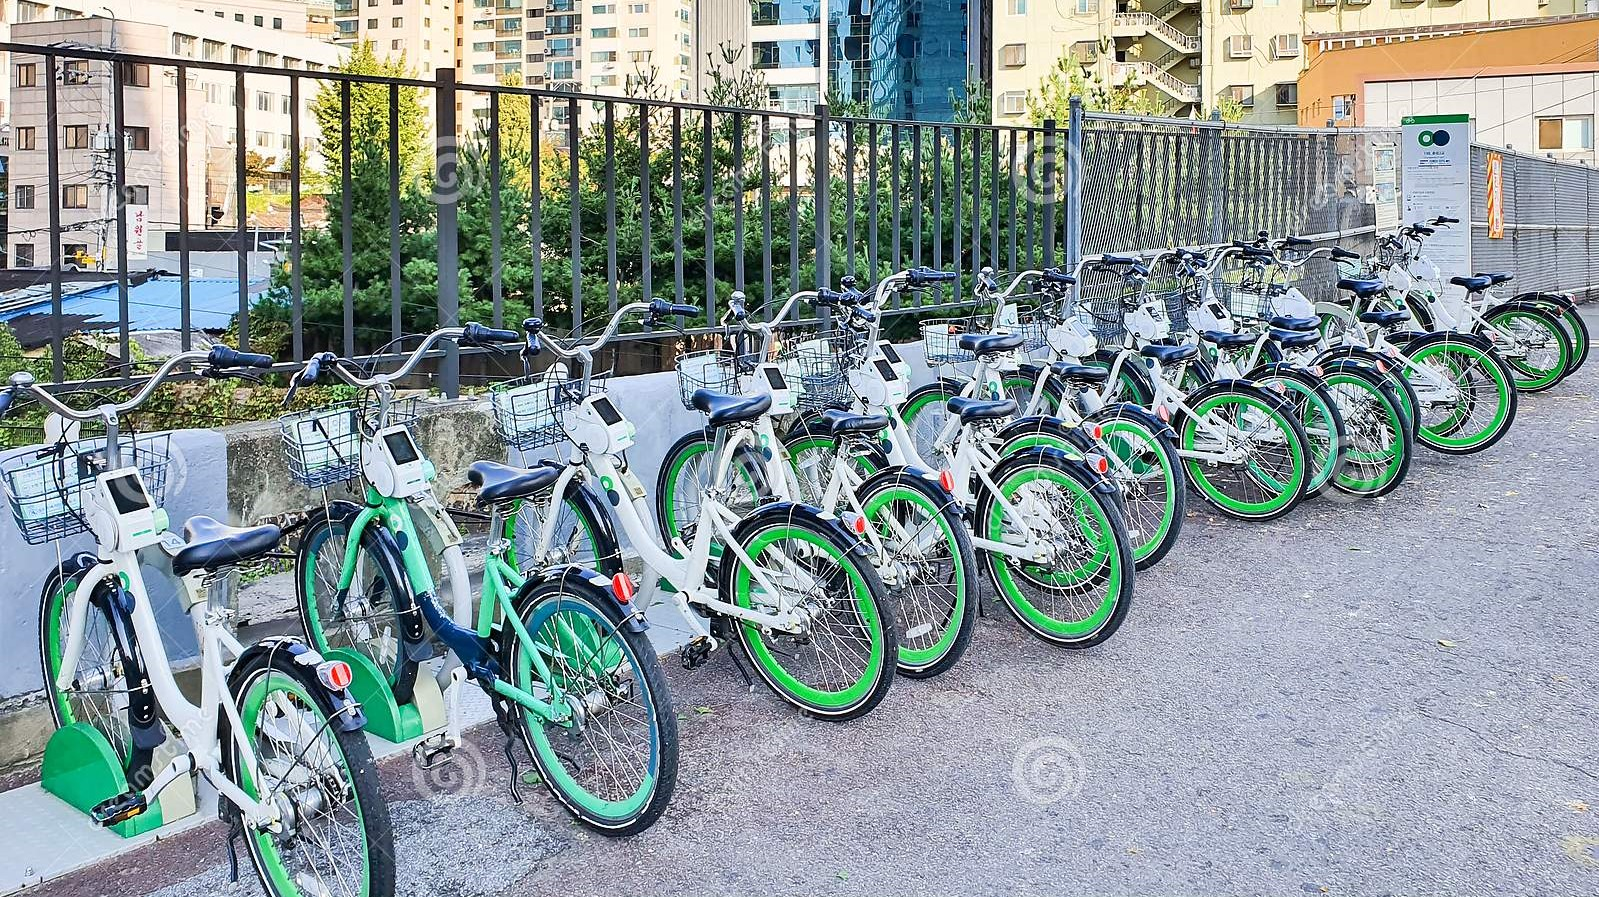

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Objective </b>

### The goal of our project was to predict the bike count required at each hour for the stable supply of rental bikes. as it is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Time to Explore and Dive into Dataset
___

In [ ]:
# begin with importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path of dataset in google drive
seoul_path = '/content/drive/MyDrive/Almabetter/Capstone project/Capstone project- 2 Supervised- Regression/SeoulBikeData.csv'

In [ ]:
# reading dataset
df_seoul = pd.read_csv(seoul_path,header=0, encoding= 'unicode_escape')  # for encoding issue

In [ ]:
# rename for our ease
df_seoul.rename({"Temperature(°C)": "Temperature",  
                      "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"},  
          axis = "columns", inplace = True)

In [ ]:
# first 5 rows of our dataset
df_seoul.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# last 5 rows of our datset
df_seoul.tail()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Number of rows and columns
df_seoul.shape

(8760, 14)

In [ ]:
# list of total columns in our dataset
df_seoul.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
# Quick info of our given dataset
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
# Statistical summary of data
df_seoul.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Statistical summary of data with include all
df_seoul.describe(include='all')

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,22/07/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
def SeoulDataInfo():
  SDinfo_df = pd.DataFrame(index=df_seoul.columns)
  SDinfo_df['Datatypes'] =  df_seoul.dtypes
  SDinfo_df['Count of non-null values'] = df_seoul.count()
  SDinfo_df['NaN values'] = df_seoul.isnull().sum()
  SDinfo_df['% NaN Values'] = (SDinfo_df['NaN values']/len(df_seoul)).round(4)*100 # or df_apps.isnull().mean()
  SDinfo_df['Unique_count'] = df_seoul.nunique()
  return SDinfo_df
SeoulDataInfo()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
Date,object,8760,0,0.0,365
Rented_Bike_Count,int64,8760,0,0.0,2166
Hour,int64,8760,0,0.0,24
Temperature,float64,8760,0,0.0,546
Humidity,int64,8760,0,0.0,90
Wind_speed,float64,8760,0,0.0,65
Visibility,int64,8760,0,0.0,1789
Dew_point_temperature,float64,8760,0,0.0,556
Solar_Radiation,float64,8760,0,0.0,345
Rainfall,float64,8760,0,0.0,61


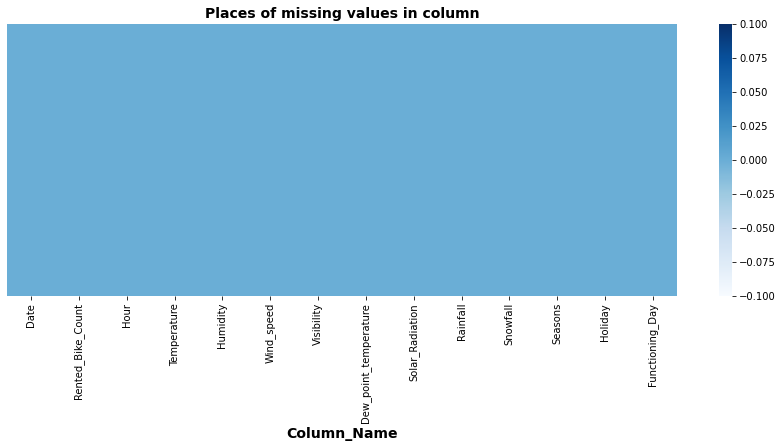

In [ ]:
# No missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df_seoul.isnull(), cbar=True, yticklabels=False,cmap='Blues')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

**Findings**
___

1. Our data is very clean.Their no any null values.
2. Their total 8760 rows and 14 columns.
3. Object datatypes columns - 4
4. Integer datatypes columns - 4
5. Float datatypes columns - 6
6. Unique count for Seasons, Holidays, Functioning Day is very very low like 4, 2 and 2 respectively.
7. No need of data cleaning step.
___

# **Exploratory Data Analysis**

---

### **Distribution and Boxplot for Dependent Variable**

Text(0.5, 0, 'Rented_Bike_Count')

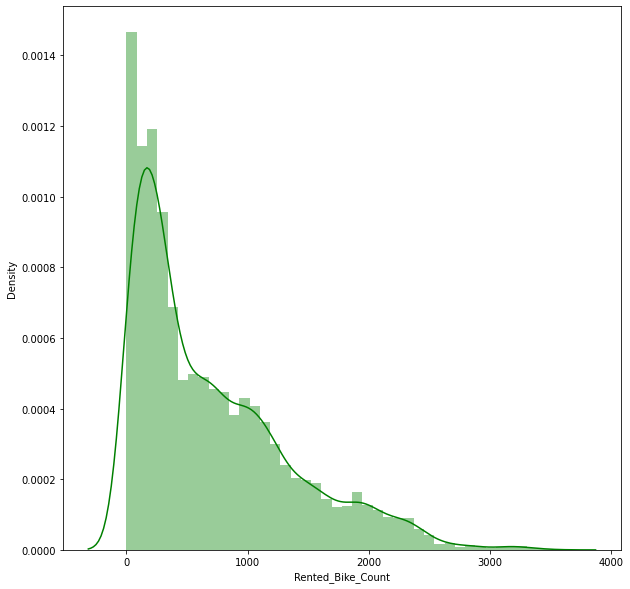

In [ ]:
# Distribution plot for dependent variable Rented Bike Count
plt.figure(figsize=(10,10))
sns.distplot((df_seoul['Rented_Bike_Count']),color='g')
plt.xlabel('Rented_Bike_Count')

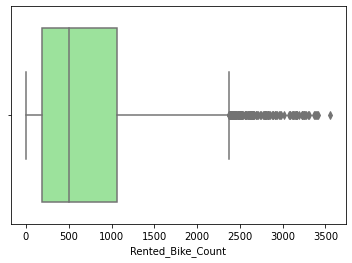

In [ ]:
# Box plot for dependent variable Rented Bike Count
sns.boxplot(df_seoul['Rented_Bike_Count'],color='lightgreen')

**Findings**
___
1. Most of the Rented bike count lies between 0 and 2300.
2. And most count is 500.
___

### **Analysis of Numeric Features**

In [ ]:
numeric_features = df_seoul.describe().columns

In [ ]:
numeric_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

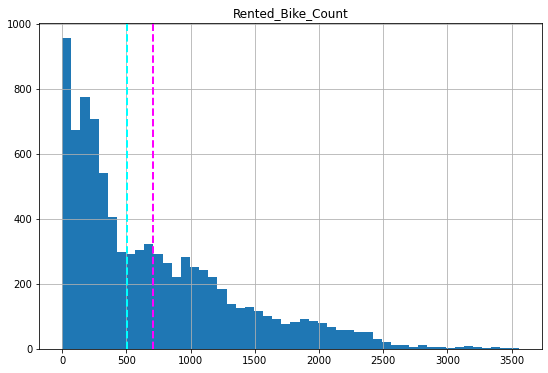

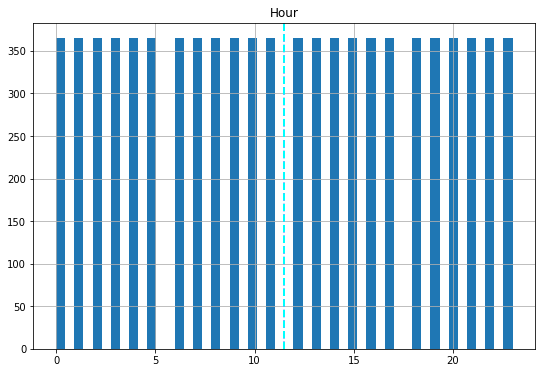

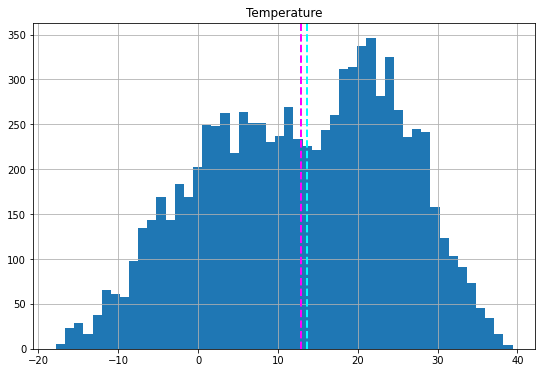

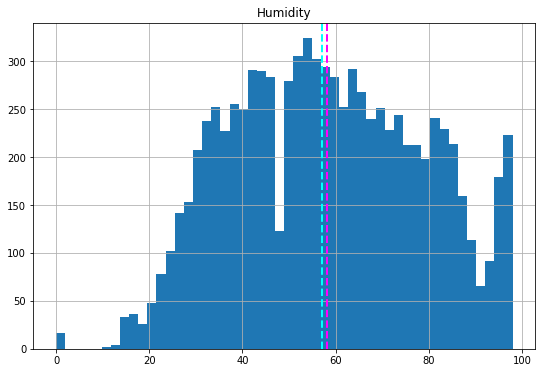

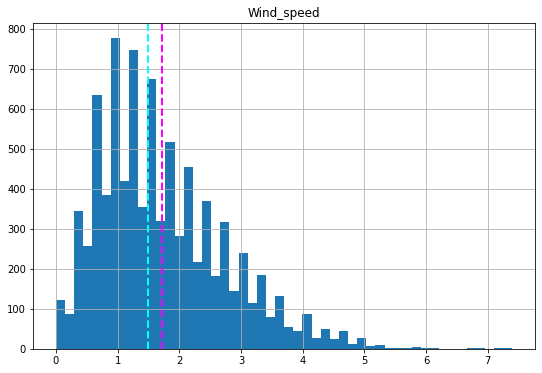

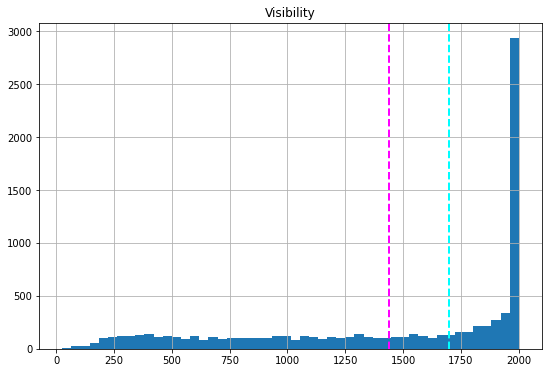

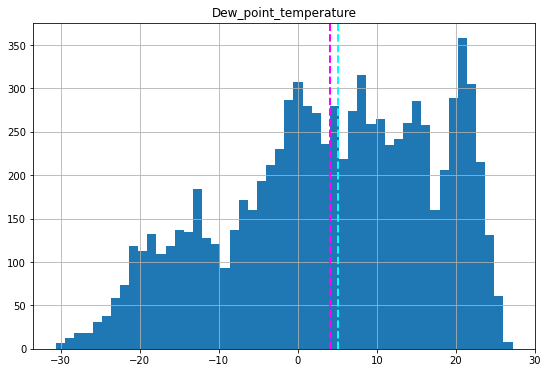

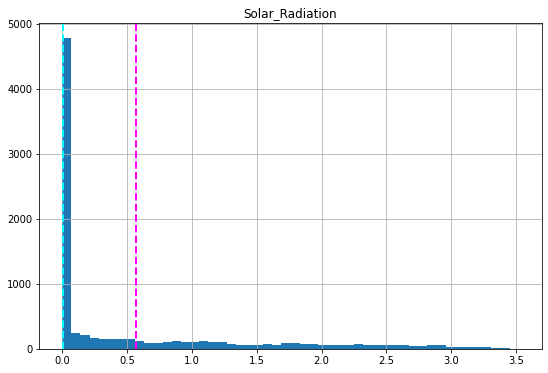

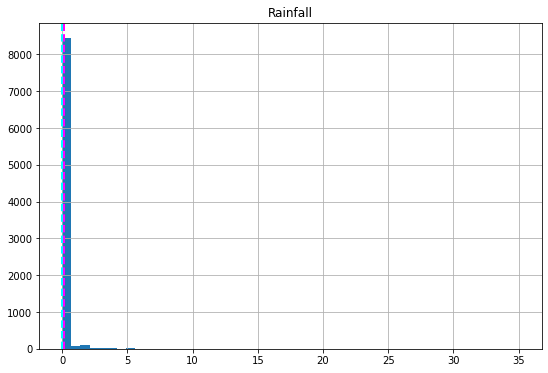

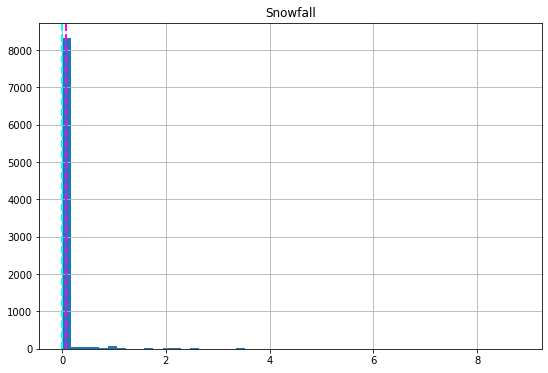

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_seoul[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

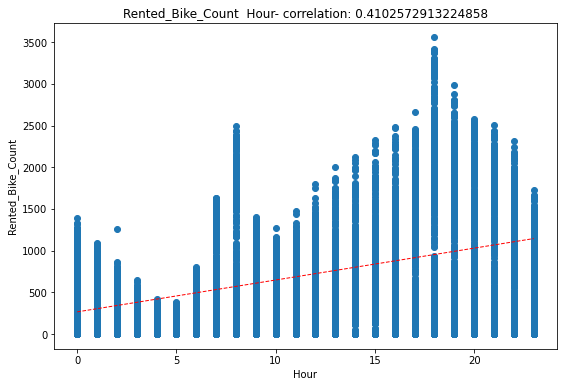

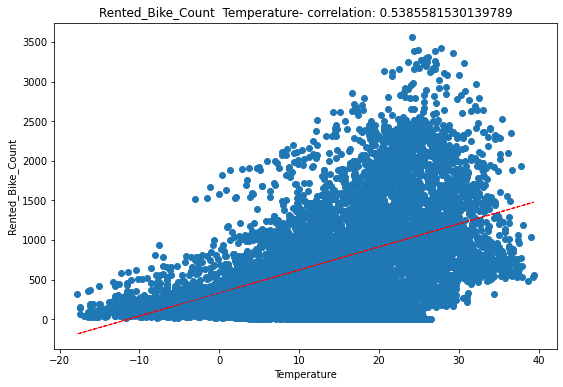

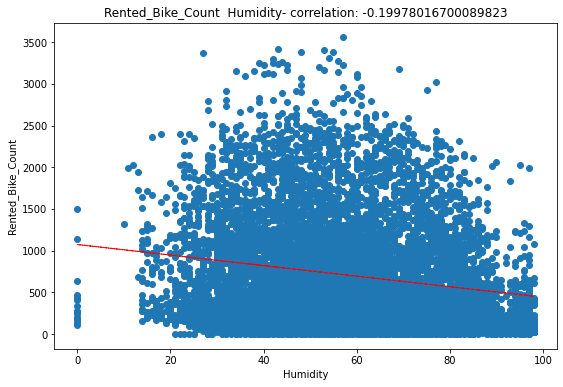

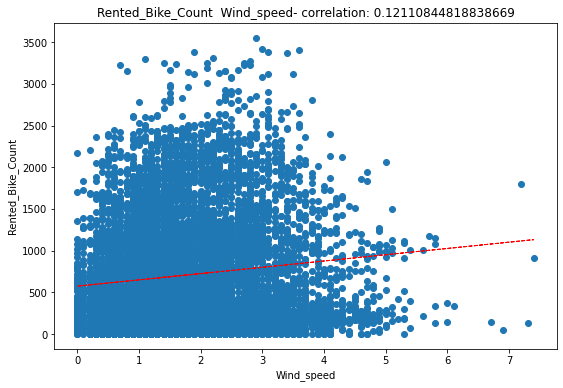

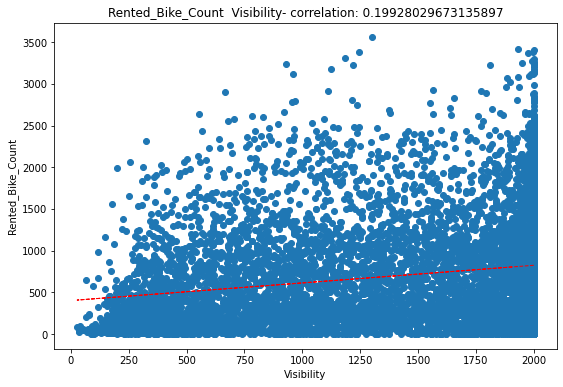

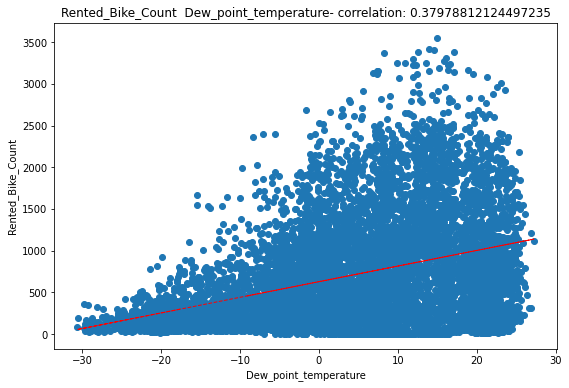

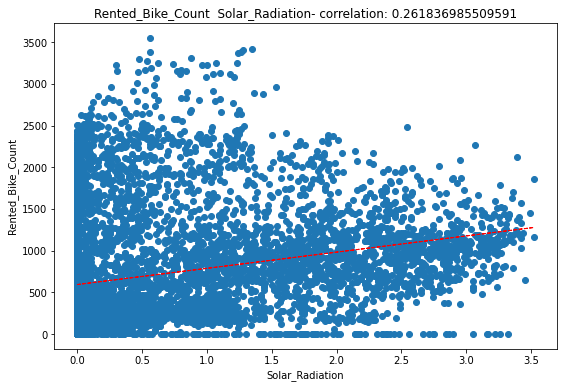

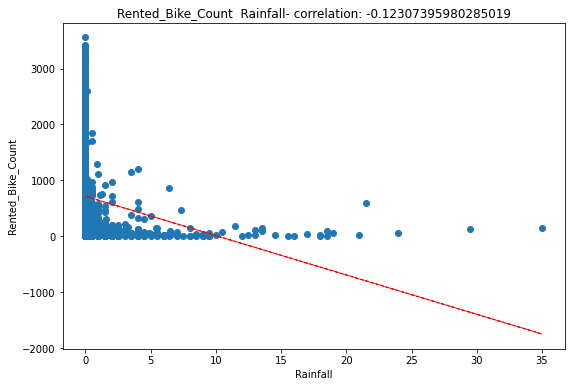

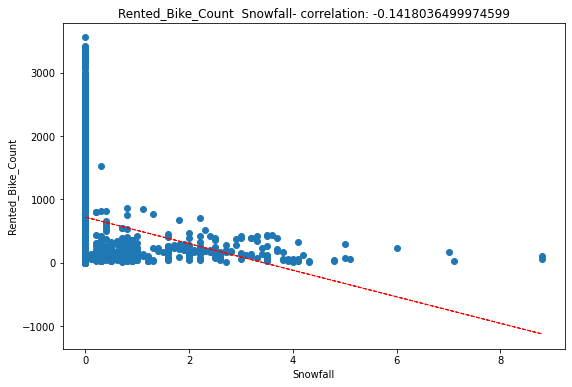

In [ ]:
for col in numeric_features[1:]:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df_seoul[col]
   label = df_seoul['Rented_Bike_Count']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Rented_Bike_Count')
   ax.set_title('Rented_Bike_Count  ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df_seoul[col], df_seoul['Rented_Bike_Count'], 1)
   y_hat = np.poly1d(z)(df_seoul[col])
 
   plt.plot(df_seoul[col], y_hat, "r--", lw=1)
 
plt.show()

**Findings**
___
1. First scatter plot showing most of the high demand during office timings around 8 A.M. and 8 P.M., and for 4 A.M. and 5 A.M. demand is very low. from all we can say timing is a important feature for predicting demand.

2. Second plot shows demand is increasing with increasing temperature.
3. Demand is decreasing with increasing humidity.
4. Wind scatter plot showing with increase in wind speed their slightly increase in demand.
5. Visiblity have approx 20% correlation with rented bike demand, so as visibilty increases demand also increases.
6. Dew point temperature has 38% correlation with demand, so as DPT increases demand increases.
7. With increasing in solar radiation bike demand increases but slightly.
8. Generally people don't prefer riding in rainfall and snowfall, so they have very high negative correaltion with bike demand.
___

### **Analysis of  Categorical Features**

In [ ]:
categorical_features = df_seoul.describe(include=['object','category']).columns

In [ ]:
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

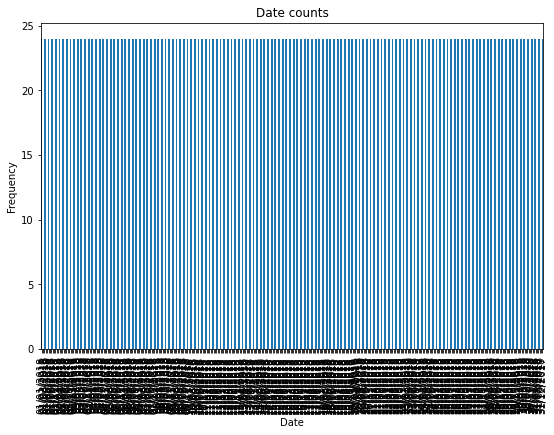

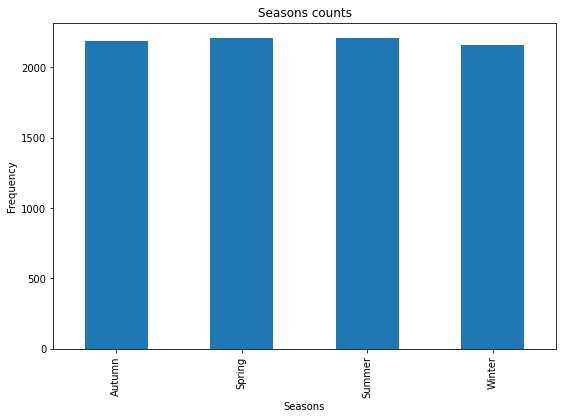

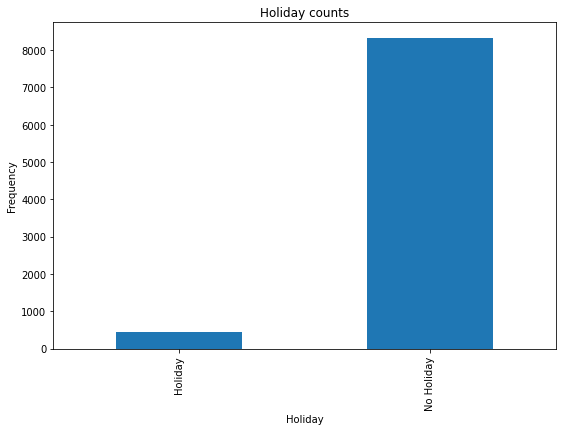

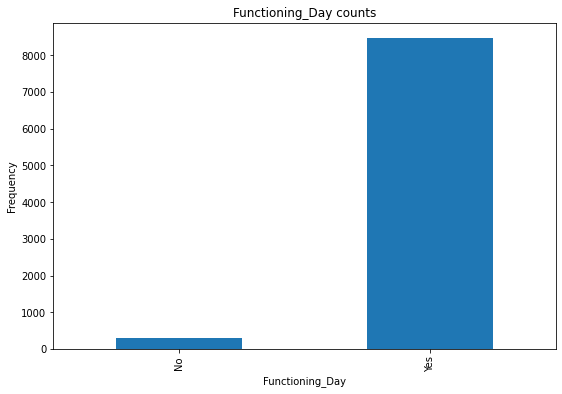

In [ ]:
# plot a bar plot for each categorical feature count  
for col in categorical_features:
    counts = df_seoul[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax)
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

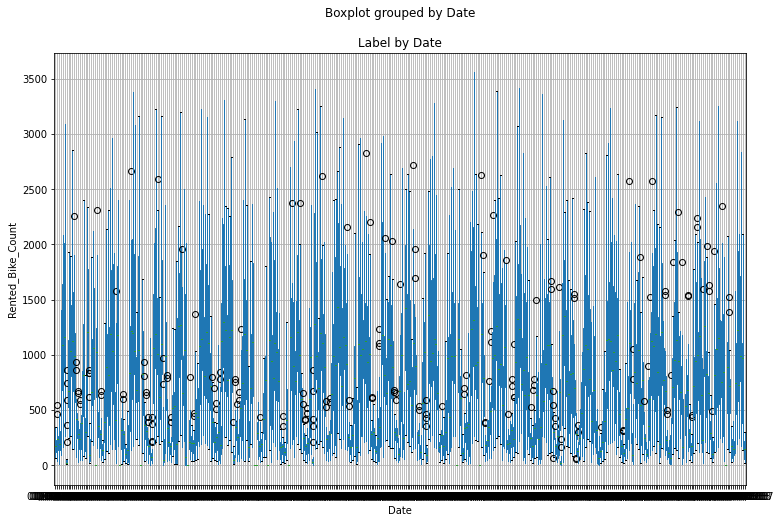

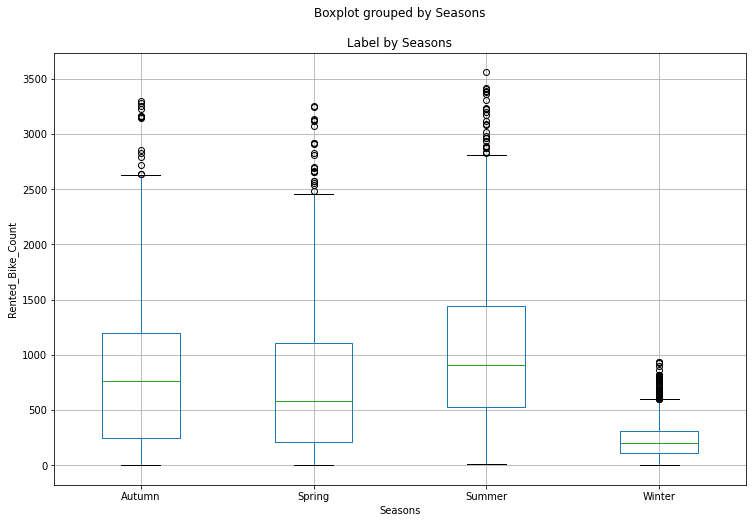

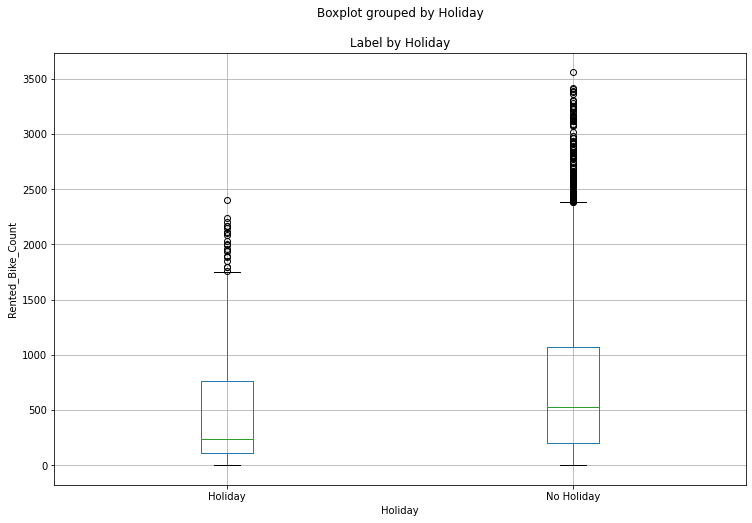

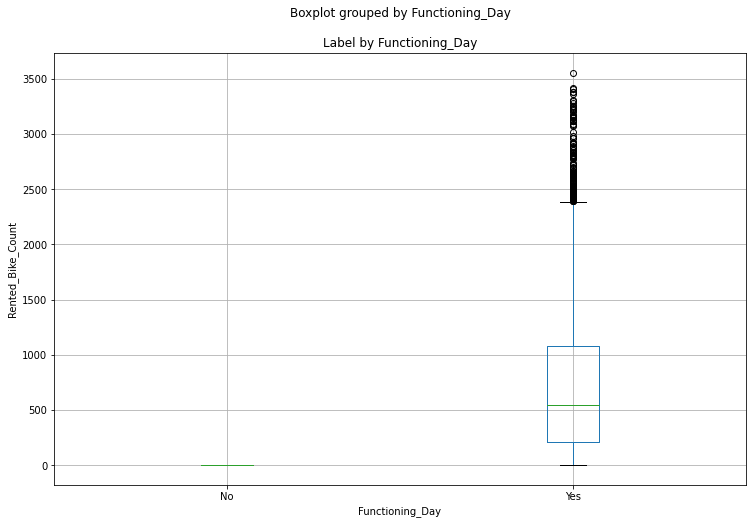

In [ ]:
# plot a boxplot for the label by each categorical feature  
for col in categorical_features:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    df_seoul.boxplot(column = 'Rented_Bike_Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented_Bike_Count")
plt.show()

Text(0, 0.5, 'Counts')

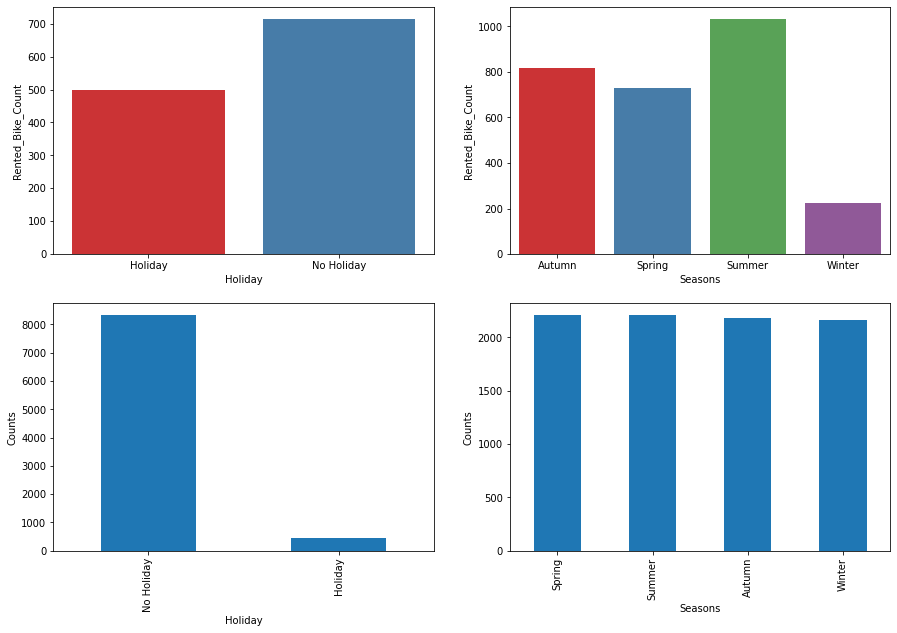

In [ ]:
# Summary of above two plots in short

Holiday_rent = pd.DataFrame(df_seoul.groupby('Holiday').agg({'Rented_Bike_Count':'mean'}))
Season_rent = pd.DataFrame(df_seoul.groupby('Seasons').agg({'Rented_Bike_Count':'mean'}))

# Bike rents in Seasons and holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday_rent.index, y = Holiday_rent['Rented_Bike_Count'],palette = "Set1")
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season_rent.index, y = Season_rent['Rented_Bike_Count'],palette = "Set1")

# How many Total Seasons and Holidays
ax1=plt.subplot(2, 2,3)
df_seoul['Holiday'].value_counts().plot(kind='bar' )
plt.xlabel('Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,4)
df_seoul['Seasons'].value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Counts')

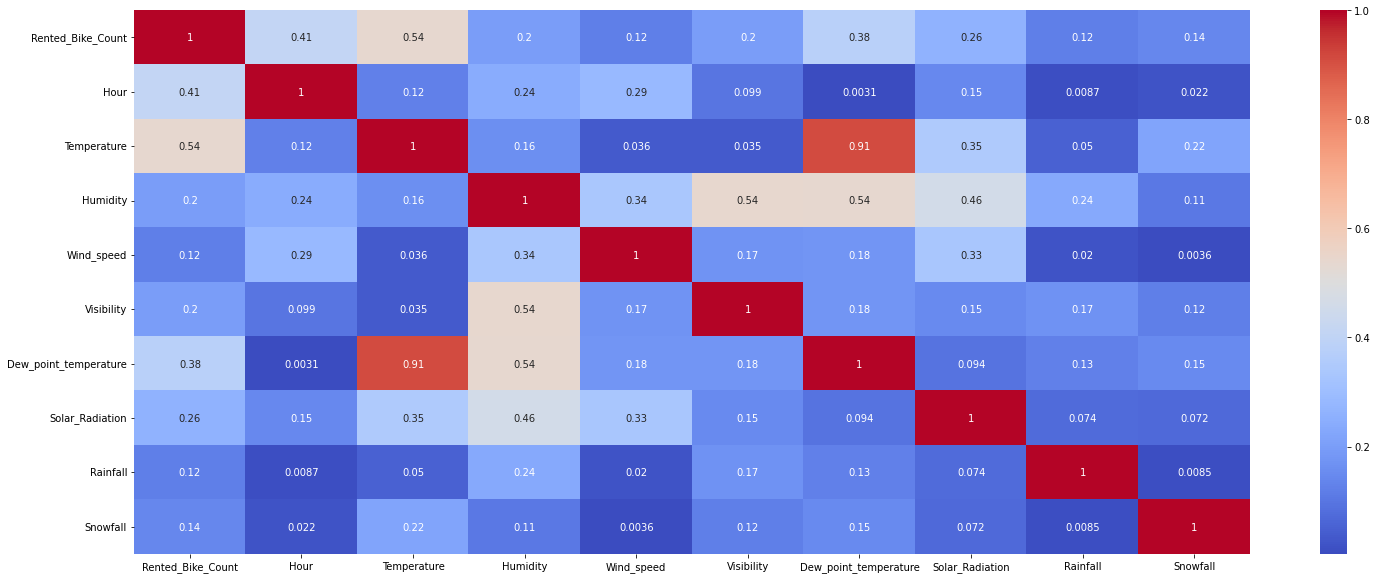

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df_seoul.corr().abs(),annot=True,cmap='coolwarm')

**Findings**
___
1. Most of the bike rented during working days or on no holiday.
2. We also observe that people prefer more renting bikes in summer season followed by autumn season.
___

## **Feature Engineering**

---
Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.




We shall convert categorical features to numeric type...


# Data Preparation

---



In [ ]:
#  Drop date column
df_seoul = df_seoul.drop(labels='Date',axis=1)

In [ ]:
# Data for all the independent variables
independent_variables = df_seoul.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable
dependent_variable = df_seoul['Rented_Bike_Count']

In [ ]:
#dependent_variable

In [ ]:
#conert categorical column into numric by ordinal or one-hot encoding
independent_variables

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# ordinal-encoder categorical columns

obj_col = ['Seasons','Holiday','Functioning_Day'] # choosing categorical columns from independent variable

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
independent_variables[obj_col] = ordinal_encoder.fit_transform(independent_variables[obj_col])
 

In [ ]:
# successfully changed
independent_variables.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3.0,1.0,1.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3.0,1.0,1.0


In [ ]:
# Create the data of independent variables
X = independent_variables.copy()

# Create the dependent variable data
y = dependent_variable.copy()

In [ ]:
#X

In [ ]:
#y

# **Implementing Linear Regression**

---
Let's now begin to train out regression model! We will need to first split up our data into an train array that contains the part of dataset used for training data, and a test array used for test data.


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state= 0)
print(X_train.shape)
print(X_test.shape)

(7008, 12)
(1752, 12)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-105.29302715556094

In [ ]:
regressor.coef_

array([ 2.70045474e+01,  1.56831607e+01, -1.12758787e+01,  1.81203790e+01,
        2.76658661e-02,  1.46825090e+01, -7.87553028e+01, -5.56969634e+01,
        3.00474349e+01, -9.76659914e+01,  1.24068751e+02,  9.37193531e+02])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_pred=regressor.predict(X_test)

## **Regression Evaluation Metrics**

---


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i| 
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) **bold text** is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
<br>All of these are loss functions, because we want to minimize them.

In [ ]:
 from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
r2_score(y_test, y_pred)

0.5434525160139043

In [ ]:
#Evaluation metrices
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

Adjusted R2 :  0.5403021020933562
MSE : 191075.43475018447
RMSE : 437.1217619270224
MAE : 325.8907133235788


Text(0, 0.5, 'Predicted Rented Bike Count')

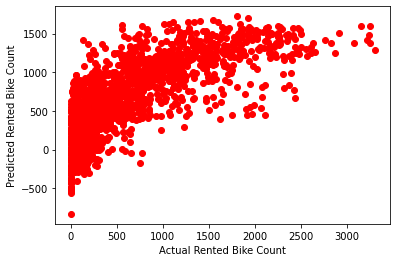

In [ ]:
# Actual vs predicated rented bike count
plt.scatter(y_test, y_pred,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')

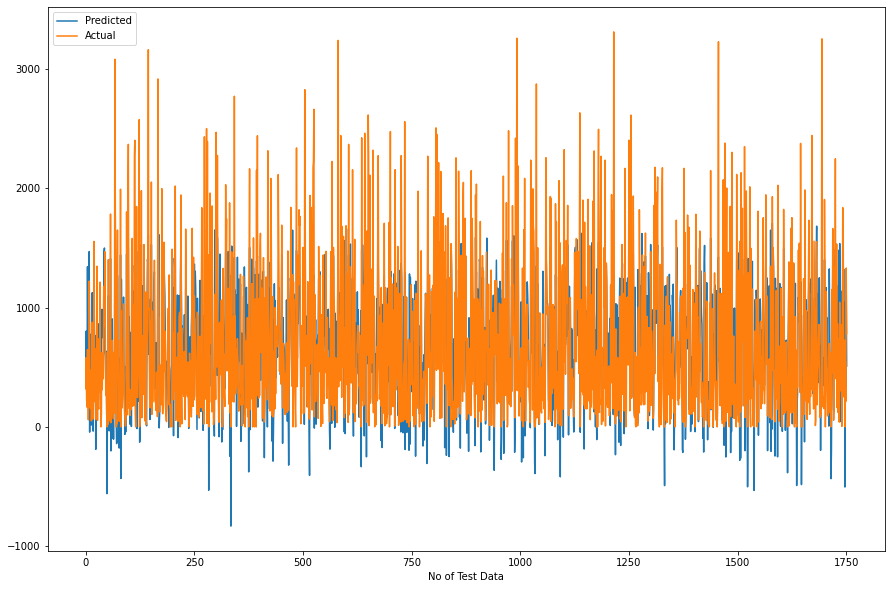

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Implementing Lasso Regression**

---
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 0.05, max_iter = 3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.05, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.5505279918146246

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_lasso)

0.5434403690036465

In [ ]:
#Evaluation metrices
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred_lasso)
print("MAE :" , MAE)

Adjusted R2 :  0.540289871262441
MSE : 191080.51854835954
RMSE : 437.12757697079644
MAE : 325.88821142615546


Text(0, 0.5, 'Lasso Predicted Rented Bike Count')

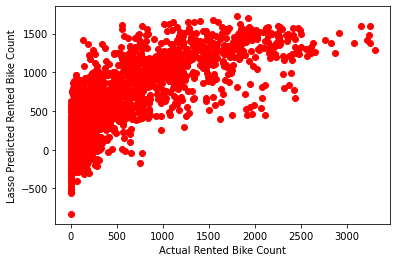

In [ ]:
# Actual vs predicated rented bike count
plt.scatter(y_test, y_pred_lasso,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Lasso Predicted Rented Bike Count')

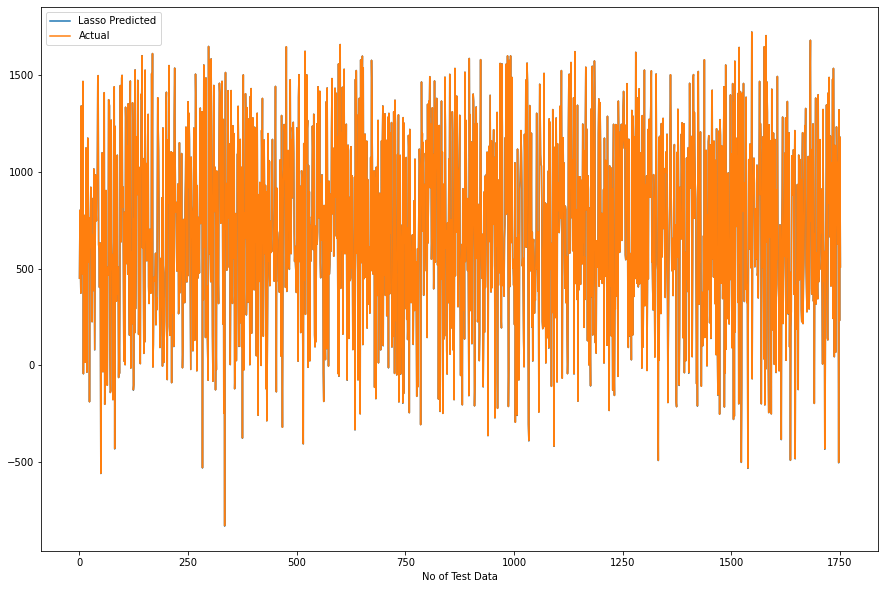

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_pred_lasso))
plt.legend(["Lasso Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Implementing Cross-Validation Procedure for Lasso**

---



In [ ]:
# cross-validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -187374.90428898338


In [ ]:
y_pred_lasso2 = lasso_regressor.predict(X_test)

In [ ]:
#Evaluation metrices
print("Adjusted R2 : ",1-(1-r2_score((y_pred_lasso2), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_pred_lasso2, y_pred_lasso)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_pred_lasso2, y_pred_lasso)
print("MAE :" , MAE)

Adjusted R2 :  0.9999992218676369
MSE : 0.17382406577568651
RMSE : 0.416922133947919
MAE : 0.2525638013242071


Text(0, 0.5, 'Lasso Predicted Rented Bike Count')

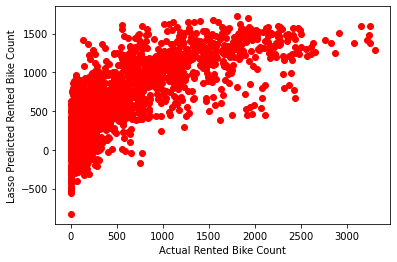

In [ ]:
# Actual vs predicated rented bike count
plt.scatter(y_test, y_pred_lasso2,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Lasso Predicted Rented Bike Count')

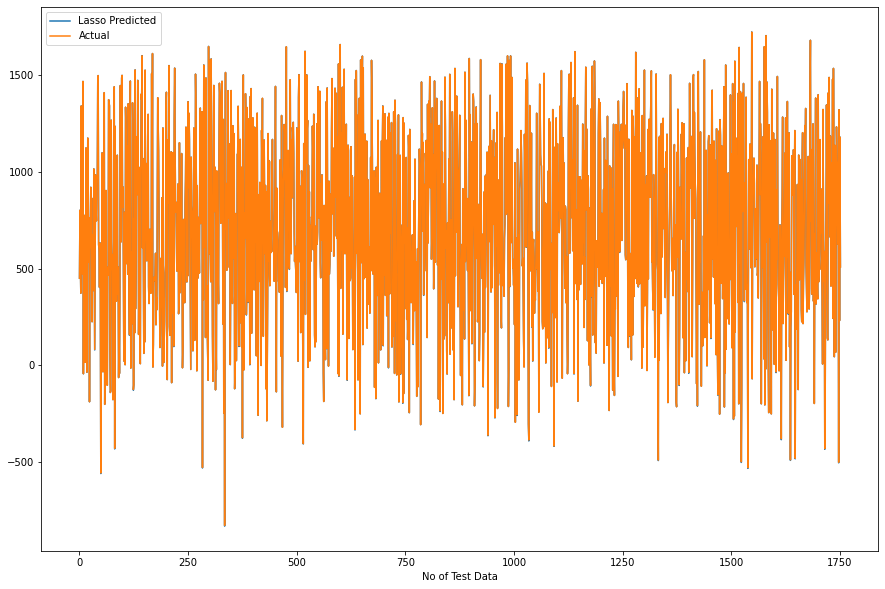

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_pred_lasso2))
plt.legend(["Lasso Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


**<br>Implementing Ridge Regression**
---
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
y_predict_r = ridge.predict(X_test)

In [ ]:
r2_score(y_test,y_predict_r)

0.5434526142573535

In [ ]:
#Evaluation metrices
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predict_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_predict_r)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_predict_r)
print("MAE :" , MAE)

Adjusted R2 :  0.540302201014736
MSE : 191075.39363308184
RMSE : 437.1217148953845
MAE : 325.8893701288135


Text(0, 0.5, 'Lasso Predicted Rented Bike Count')

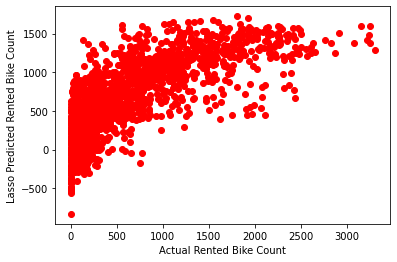

In [ ]:
# Actual vs predicated rented bike count
plt.scatter(y_test, y_predict_r,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Lasso Predicted Rented Bike Count')

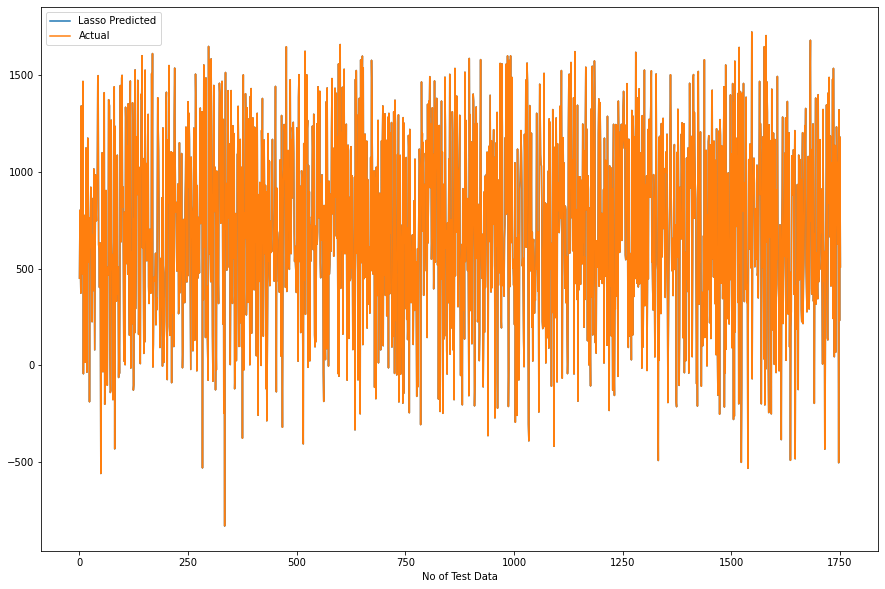

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_predict_r))
plt.legend(["Lasso Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


**<br>Random Forest Regressor**
---
 


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.27826723, 0.32152701, 0.07705204, 0.01771899, 0.019757  ,
       0.03409608, 0.09167214, 0.04345696, 0.00085218, 0.03312101,
       0.0030473 , 0.07943207])

In [ ]:
y_predict_r = ridge.predict(X_test)

In [ ]:
r2_score(y_test,y_predict_r)

0.5434526142573535

In [ ]:
#Evaluation metrices
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predict_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_predict_r)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_predict_r)
print("MAE :" , MAE)

Adjusted R2 :  0.540302201014736
MSE : 191075.39363308184
RMSE : 437.1217148953845
MAE : 325.8893701288135


Text(0, 0.5, 'Lasso Predicted Rented Bike Count')

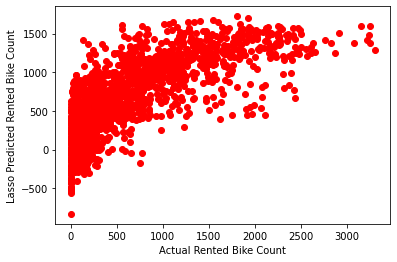

In [ ]:
# Actual vs predicated rented bike count
plt.scatter(y_test, y_predict_r,color='r')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Lasso Predicted Rented Bike Count')

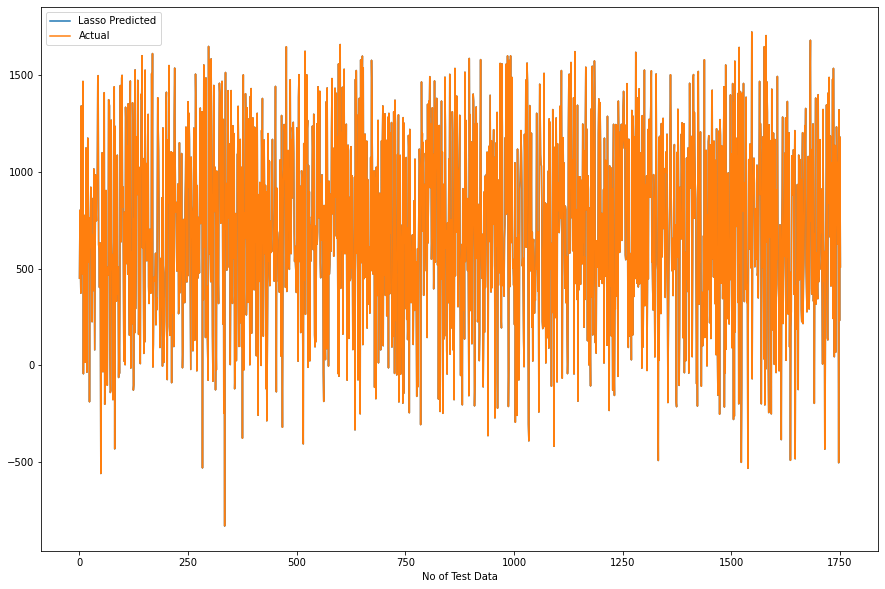

In [ ]:

plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_predict_r))
plt.legend(["Lasso Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**<br>Implementing XGBoost**
---

In [ ]:
import xgboost as xgb
dreg= xgb.XGBRegressor(booster= 'gbtree',colsample_bylevel= 1, colsample_bynode= 1,colsample_bytree= 0.7,eta= 0.004,
                        gamma= 0,importance_type= 'gain',learning_rate= 0.1,max_delta_step= 0, max_depth= 9,min_child_weight= 10,
                        n_estimators= 100,n_jobs= 1,objective= 'reg:linear',random_state= 0,reg_alpha= 0,reg_lambda= 1,
                        scale_pos_weight= 1,subsample= 1,verbosity= 1)
dreg.fit(X_train, y_train)

[10:52:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, eta=0.004, max_depth=9, min_child_weight=10)

In [ ]:
y_pred_xg = dreg.predict(X_test)

In [ ]:
#Find R-squared value
r2 = r2_score(y_test, y_pred_xg)
r2

0.8786170470356018

In [ ]:
# Find Adjusted R-squared value
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_pred_xg)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred_xg)
print("MAE :" , MAE)

Adjusted R2 :  0.8777794418397578
MSE : 50801.507668893275
RMSE : 225.3918979663938
MAE : 140.27660047245897


In [ ]:
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.9667818524305548
Test score: 0.8786170470356018


**<br>Grid Search CV on XGboost algorithm**
---

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[10:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:59] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:

train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,y_test)

0.9520762741518607

##For Test dataset:

In [ ]:

#Find R-squared value
r2 = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9520762741518607

In [ ]:
adj_r2

0.9517455756411202

##For Train dataset

In [ ]:
#Find R-squared value
r2 = r2_score(y_train, train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, train_preds))*((X_train.shape[0]-1)/(X_train.shape[0]-X_test.shape[1]-1))

In [ ]:
r2


0.9514125490935283

In [ ]:
adj_r2

0.9513291967831813

# **Conclusion:**

- Most of the bike rented during working days or on no holiday.

- We also observe that people prefer more renting bikes in summer season followed by autumn season.

- The XGBoost model have highest score i.e. 95% among.

- Demand is decreasing with increasing humidity.

- Wind scatter plot showing with increase in wind speed their slightly increase in demand.

- Visiblity have approx 20% correlation with rented bike demand, so as visibilty increases demand also increases.

- Dew point temperature has 38% correlation with demand, so as DPT increases demand increases.

- With increasing in solar radiation bike demand increases but slightly.

- Generally people don't prefer riding in rainfall and snowfall, so they have very high negative correaltion with bike demand.


# **Scope of Improvement:**
Future work includes adding more predictive parameters and Training other machine models such as ANN (Artificial Neural Network) can further boost the predictive capacity; Seoul Bike Sharing  is a improving domain and has a lot of reach in future. Also we can work on the day/week feature to explore more on the model performance, and try various hyper-parameter tuning methods. 

#**Thanks**